In [728]:
import numpy as np
import pandas as pd

In [729]:
df=pd.read_csv("Data.csv")
df

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes
5,France,35.0,58000.0,Yes
6,Spain,NaN,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


In [730]:

# x=df.iloc[:,:-1]
# print(x.iloc[:,1].sum())
x=df.iloc[:,1:-1].values
y=(df["Purchased"]=="Yes").astype(int).values
print(y)
y

[0 1 0 0 1 1 0 1 0 1]


array([0, 1, 0, 0, 1, 1, 0, 1, 0, 1])

In [731]:
print(x)

[[4.4e+01 7.2e+04]
 [2.7e+01 4.8e+04]
 [3.0e+01 5.4e+04]
 [3.8e+01 6.1e+04]
 [4.0e+01     nan]
 [3.5e+01 5.8e+04]
 [    nan 5.2e+04]
 [4.8e+01 7.9e+04]
 [5.0e+01 8.3e+04]
 [3.7e+01 6.7e+04]]


In [732]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy="mean")
# fit method find missing values and find mean.
# transform applies transformation

x[:,:]=imputer.fit_transform(x[:,:])
x

array([[4.40000000e+01, 7.20000000e+04],
       [2.70000000e+01, 4.80000000e+04],
       [3.00000000e+01, 5.40000000e+04],
       [3.80000000e+01, 6.10000000e+04],
       [4.00000000e+01, 6.37777778e+04],
       [3.50000000e+01, 5.80000000e+04],
       [3.87777778e+01, 5.20000000e+04],
       [4.80000000e+01, 7.90000000e+04],
       [5.00000000e+01, 8.30000000e+04],
       [3.70000000e+01, 6.70000000e+04]])

In [733]:
x[:,1].mean()

63777.777777777774

In [734]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
mnscl=MinMaxScaler()
x=mnscl.fit_transform(x)
x

,0,1
0,0.748148,0.610229
1,-1.518519,-0.913580
2,-1.118519,-0.532628
3,-0.051852,-0.088183
4,0.214815,0.088183
5,-0.451852,-0.278660
6,0.051852,-0.659612
7,1.281481,1.054674
8,1.548148,1.308642
9,-0.185185,0.292769


In [735]:
def act(x):
    return 1/(1+ np.exp(-x))
def derivative(x):
    return x*(1-x)

In [736]:

i_n=2
h_n=9
h_o=1

np.random.seed(42)
w1 = np.random.randn(input_size, hidden_size)
b1 = np.zeros((1, hidden_size))
w2 = np.random.randn(hidden_size, output_size)
b2 = np.zeros((1, output_size))
w1.shape

y=y.reshape(len(x),1)
y

array([[0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1]])

[0.02830977 0.07169023 0.02830977 0.02830977 0.07169023 0.07169023
 0.02830977 0.07169023 0.02830977 0.07169023 0.03022296 0.06977704
 0.03022296 0.03022296 0.06977704 0.06977704 0.03022296 0.06977704
 0.03022296 0.06977704 0.03210135 0.06789865 0.03210135 0.03210135
 0.06789865 0.06789865 0.03210135 0.06789865 0.03210135 0.06789865
 0.03391259 0.06608741 0.03391259 0.03391259 0.06608741 0.06608741
 0.03391259 0.06608741 0.03391259 0.06608741 0.03562962 0.06437038
 0.03562962 0.03562962 0.06437038 0.06437038 0.03562962 0.06437038
 0.03562962 0.06437038 0.03723231 0.06276769 0.03723231 0.03723231
 0.06276769 0.06276769 0.03723231 0.06276769 0.03723231 0.06276769
 0.03870798 0.06129202 0.03870798 0.03870798 0.06129202 0.06129202
 0.03870798 0.06129202 0.03870798 0.06129202 0.0400509  0.0599491
 0.0400509  0.0400509  0.0599491  0.0599491  0.0400509  0.0599491
 0.0400509  0.0599491  0.04126115 0.05873885 0.04126115 0.04126115
 0.05873885 0.05873885 0.04126115 0.05873885 0.04126115 0.058738

C:\Users\kello\AppData\Local\Temp\ipykernel_17608\3516417595.py:2: RuntimeWarning: overflow encountered in exp
  return 1/(1+ np.exp(-x))


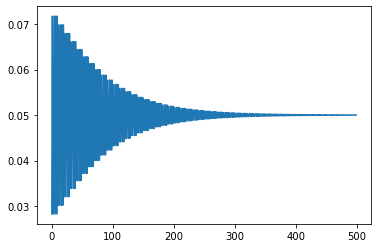

In [737]:
l=0.1
error=0
lt=np.array([])
for j in range(50):
        error=0
            #directly can also give input matrix without iterating each input
        t=y
        i=x
        # i - 10x2 w1 2x4 o = 10x4 
        hidden_o=act(i@w1+b1) #10x4
        final_o=act(hidden_o@w2+b2) #10x1
        error=abs(t-final_o)        
    
        final_e=derivative(final_o)*(t-final_o) #1x1
        hidden_e=derivative(hidden_o)*(final_e@w2.T)  #should be 1x4

        #final_e 1x1 and hidden_o is 1x4
        #i is 1x2 and hidden_e is 1x4
#         print(final_e)

        w2+=l*(hidden_o.T@final_e)   #should be 4x1
        w1+=l*(i.T@hidden_e)         #should be 2x4
    
        b2+=l*np.mean(final_e,axis=0)
        b1+=l*np.mean(hidden_e,axis=0)  
        
        error=error/len(error)
        lt=np.append(lt,error)
lt #to check if error reducing

print(lt)
plt.plot(lt)

In [738]:
def predict(x):
    hidden_o=act(x@w1+b1)
    final_o=act(hidden_o@w2+b2)
    return final_o


In [739]:
test=x
for i in test:
    print(predict(i))

[[0.49975413]]
[[0.49975413]]
[[0.49975413]]
[[0.49975413]]
[[0.49975413]]
[[0.49975413]]
[[0.49975413]]
[[0.49975413]]
[[0.49975413]]
[[0.49975413]]


C:\Users\kello\AppData\Local\Temp\ipykernel_17608\3516417595.py:2: RuntimeWarning: overflow encountered in exp
  return 1/(1+ np.exp(-x))


In [740]:
test=x
for i in test:
    print(np.round(predict(i)))
y

[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]


C:\Users\kello\AppData\Local\Temp\ipykernel_17608\3516417595.py:2: RuntimeWarning: overflow encountered in exp
  return 1/(1+ np.exp(-x))


array([[0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1]])